In [23]:
import scipy.io
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm #progress bar for visualization of progress
import chipwhisperer as cw
import sys
sys.path.append( '../ASCON_init_python' )
sys.path.append( '../sca_python/analyzer/attack/ascon/' )


In [24]:
project_file = "../../traceset/ascon/sca_test_CW305_ascon_init_SBOX_ASCON_300000.cwp"
project = cw.open_project(project_file)
traces = project.waves[:]
nonces = project.textins[:]
keys = project.keys[:]
print(f"Traces are of type : {type(traces)}. number of traces: {len(traces)}, each trace composed of {len(traces[0])} samples ({traces[0].dtype}) that is of class {type(traces[0])}")

Traces are of type : <class 'list'>. number of traces: 300000, each trace composed of 1612 samples (float64) that is of class <class 'numpy.memmap'>


In [25]:
print(f"Nonce is stored as {len(nonces[0])} {type(nonces[0][0])}\nExample : nonce at execution 0 is {[format(value, '02X') for value in nonces[0][:]]}")
print(f"Key is stored as {len(keys[0])} {type(keys[0][0])}\nExample : key at execution 0 is {[format(value, '02X') for value in keys[0][:]]}")

Nonce is stored as 16 <class 'numpy.uint8'>
Example : nonce at execution 0 is ['06', 'CA', 'A9', '40', 'CE', '7F', '2B', 'BD', '10', '72', 'D9', '86', 'EB', '65', '3E', '06']
Key is stored as 16 <class 'numpy.int64'>
Example : key at execution 0 is ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0A', '0B', '0C', '0D', '0E', '0F']


In [28]:
nonces_formatted = np.empty((len(nonces), len(nonces[0])), dtype=np.uint8)
for i in range(len(nonces[0])):
    nonces_formatted[i] = [np.uint8(value) for value in nonces[0]]
nonces = nonces_formatted
print(f"Nonce is stored as {len(nonces[0])} {type(nonces[0,0])}\nExample : nonce at execution 0 is {[format(value, '02X') for value in nonces[0,:]]}")

keys_formatted = np.empty((len(keys), len(keys[0])), dtype=np.uint8)
for i in range(len(keys)):
    keys_formatted[i] = [np.uint8(value %256) for value in keys[0]]
keys = keys_formatted
print(f"Key is stored as {len(keys[0])} {type(keys[0][0])}\nExample : key at execution 0 is {[format(value, '02X') for value in keys[0][:]]}")


Nonce is stored as 16 <class 'numpy.uint8'>
Example : nonce at execution 0 is ['06', 'CA', 'A9', '40', 'CE', '7F', '2B', 'BD', '10', '72', 'D9', '86', 'EB', '65', '3E', '06']
Key is stored as 16 <class 'numpy.uint8'>
Example : key at execution 0 is ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0A', '0B', '0C', '0D', '0E', '0F']


First must be check if the traces are well aligned

Plotting the first 10 traces to see if they are aligned


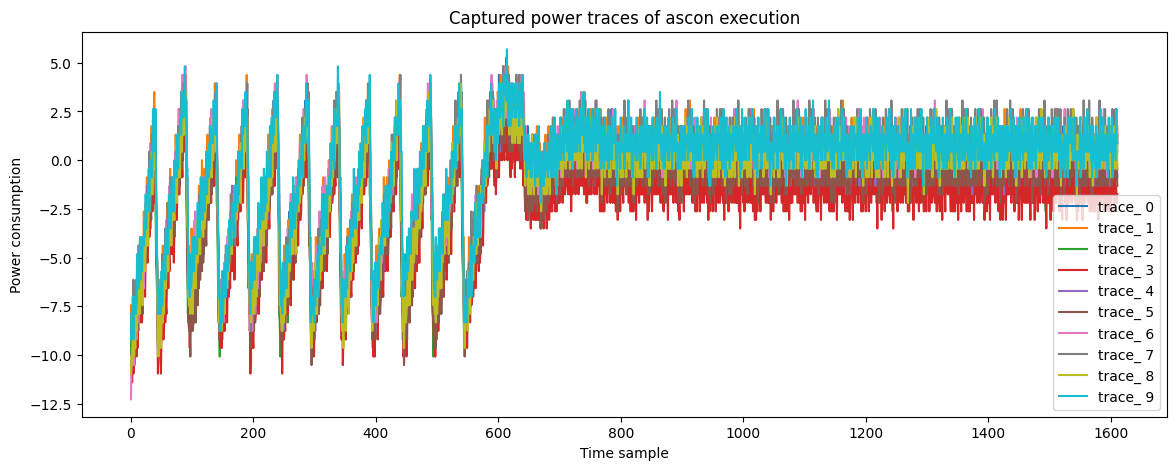

In [ ]:
print("Plotting the first 10 traces to see if they are aligned")
fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('Captured power traces of ascon execution')
ax.set_xlabel('Time sample')
ax.set_ylabel('Power consumption [mV]')
for i in range(10):
    ax.plot(traces[i]*10**3, label=f'trace_ {i}')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Trace of first round ascon after windowing')

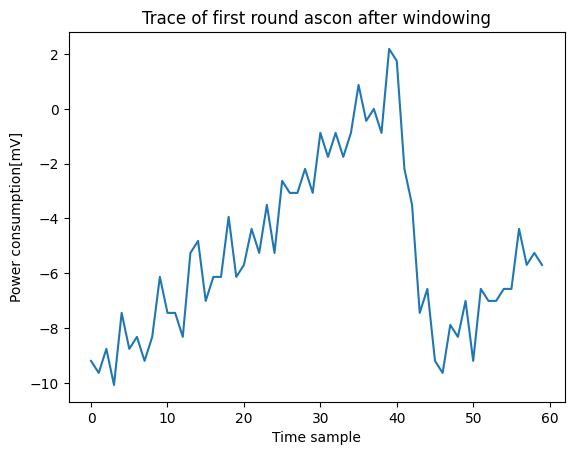

In [ ]:
wind_traces = []
for trace in traces:
    wind_traces.append(trace[:60])
plt.plot(wind_traces[0]*10**3)
plt.xlabel('Time sample')
plt.ylabel('Power consumption[mV]')
plt.title('Trace of first round ascon')

The signal to noise ratio measure how the signal is spread around the mean ($Var(signal)$) and normalize the resultis based on the influence of the noise 

$SNR = \frac{Var(signal)}{Var(noise)}$

In the side channel analysis the signal is the power weight of the targetted information. 

As previously explained in the case of ASCON is enough a subset of bits of the output register to recover the key. 
It's convenient to select the bits with highest weight on the power consumption since are the ones with highest leakage

In [31]:
sbox = np.empty(16, dtype=np.uint8)
sbox =[ 0x04, 0x0b, 0x1f, 0x14, 0x1a, 0x15, 0x09, 0x02, 
        0x1b, 0x05, 0x08, 0x12, 0x1d, 0x03, 0x06, 0x1c,
        0x1e, 0x13, 0x07, 0x0e, 0x00, 0x0d, 0x11, 0x18, 
        0x10, 0x0c, 0x01, 0x19, 0x16, 0x0a, 0x0f, 0x17 ]
iv = np.empty(8, dtype=np.uint8)
iv=[0x80, 0x40, 0x0c, 0x06, 0x00, 0x00, 0x00, 0x00]
c_r = np.empty(8, dtype=np.uint8)
c_r=[0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0xf0]

In [ ]:
def ascon_first_round(iv, key, nonce):
    """
    iv, key, nonce : expected as numpy array of uint8
    """
    reg = []    
    reg.append() 
    reg[1] = 
    # --- round constant addition ---
    S[2] ^= (0xf0 - 0*0x10 +0*0x1)
    
    # --- substitution layer ---
    S = sbox[]

    # Linear diffusion layer
    S[0] ^= rotr(S[0], 19) ^ rotr(S[0], 28)
    S[1] ^= rotr(S[1], 61) ^ rotr(S[1], 39)
    S[2] ^= rotr(S[2],  1) ^ rotr(S[2],  6)
    S[3] ^= rotr(S[3], 10) ^ rotr(S[3], 17)
    S[4] ^= rotr(S[4],  7) ^ rotr(S[4], 41)

    return S

In [ ]:
# Compute SNR for the bit 0 of output register x0 (y0[0])
# Split the traceset based on the value of y0[0]


def ascon_first_round(iv, cr)
    return state

State = [] # list of five 64_bits registers
# Addition of round constant 
S[2] ^=()

""" Function that calculates for the register x4 the difference of means for a certain subkey
Args:
    bitnum (int) : index of the bit interested 
    k (int) : key of the current trace 
    trace : execution trace  
    nonce : nonce
    sub_layer_type (string): specify the type of S-box (not used )
"""

sub_layer(k[i], 0, x3, x4, bitnum, rs[i], sub_layer_type))
            rs = [0, 19, 28] => round shifts

def compute_output_bit(x1, x2, x3, x4, bitnum, rs, sub_layer_type):
    for i in range(3):
        # addition of round constant
        sbox_input = iv_bit[(bitnum + rs) % 64], x1, x2^self.c_r_bit[(bitnum + rs) % 64], x3[(bitnum + rs) % 64], x4[(bitnum + rs) % 64])
        return utils.hex_to_bit(ascon.sbox(sub_layer_type, sbox_input))
        return output_bit 
        
label_y0_lsb = []
for i in range(len(wind_traces)):
    key = keys[i]
    


<class 'numpy.memmap'>
